<a href="https://colab.research.google.com/github/CezarMontenegro/heart_disease_prediction/blob/main/heartFailurePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Prediction**

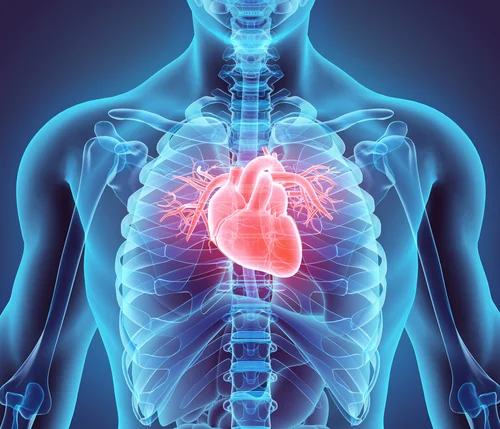

As doenças cardiovasculares são um grupo de distúrbios que envolvem o coração e os vasos sanguíneos e uma das principais causas de morte em todo o mundo, de acordo com a American Heart Association. Em 2019, as doenças cardiovasculares tiraram a vida de quase 18 milhões de pessoas, representando 32% das mortes em todo o mundo (Organização Mundial da Saúde, 2021). 85% dessas mortes foram causadas por ataques cardíacos e derrames, com 38% entre pessoas com menos de 70 anos. A detecção precoce é fundamental no tratamento e gerenciamento de doenças cardiovasculares, em que o aprendizado de máquina pode ser uma ferramenta poderosa na detecção de um possível coração diagnóstico da doença.

&nbsp;

Neste projeto desenvolverei um modelo de classificação para prever a presença de doenças cardiovasculares em determinado indivíduo.

## **1.0 Importando Bibliotecas e Dataset**

In [44]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [45]:
# Importando df
heart_db = pd.read_csv('heart.csv')

## **2.0 Limpeza / Tratamento dos dados**

In [46]:
heart_db

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [47]:
# Valores nulos
heart_db.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [48]:
# Valores unicos
heart_db.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [49]:
# Tipos das colunas
heart_db.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [50]:
# Transformand coluna FastingBS em categórica
heart_db['FastingBS'] = heart_db['FastingBS'].apply( lambda row: 'N' if row == 0 else row).apply( lambda row: 'Y' if row == 1 else row)
heart_db['FastingBS']

0      N
1      N
2      N
3      N
4      N
      ..
913    N
914    Y
915    N
916    N
917    N
Name: FastingBS, Length: 918, dtype: object

In [51]:
# Transformand coluna alvo em categórica
heart_db['HeartDisease'] = heart_db['HeartDisease'].apply( lambda row: 'N' if row == 0 else row).apply( lambda row: 'Y' if row == 1 else row)
heart_db['HeartDisease']

0      N
1      Y
2      N
3      Y
4      N
      ..
913    Y
914    Y
915    Y
916    Y
917    N
Name: HeartDisease, Length: 918, dtype: object

In [52]:
# Tipos das colunas
heart_db.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS          object
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease       object
dtype: object

## **3.0 Análise Exploratória (EDA)**

In [53]:
# Filtrando colunas por tipos
categoric_columns = heart_db.columns[ heart_db.dtypes == object]
numeric_columns = heart_db.columns[ heart_db.dtypes != object]

In [54]:
# Proporção dos valores nas colunas categóricas
for column in categoric_columns:
  print( column )
  print( heart_db[column].value_counts(normalize=True) * 100)
  print( '\n')

Sex
M    78.976035
F    21.023965
Name: Sex, dtype: float64


ChestPainType
ASY    54.030501
NAP    22.113290
ATA    18.845316
TA      5.010893
Name: ChestPainType, dtype: float64


FastingBS
N    76.688453
Y    23.311547
Name: FastingBS, dtype: float64


RestingECG
Normal    60.130719
LVH       20.479303
ST        19.389978
Name: RestingECG, dtype: float64


ExerciseAngina
N    59.586057
Y    40.413943
Name: ExerciseAngina, dtype: float64


ST_Slope
Flat    50.108932
Up      43.028322
Down     6.862745
Name: ST_Slope, dtype: float64


HeartDisease
Y    55.337691
N    44.662309
Name: HeartDisease, dtype: float64




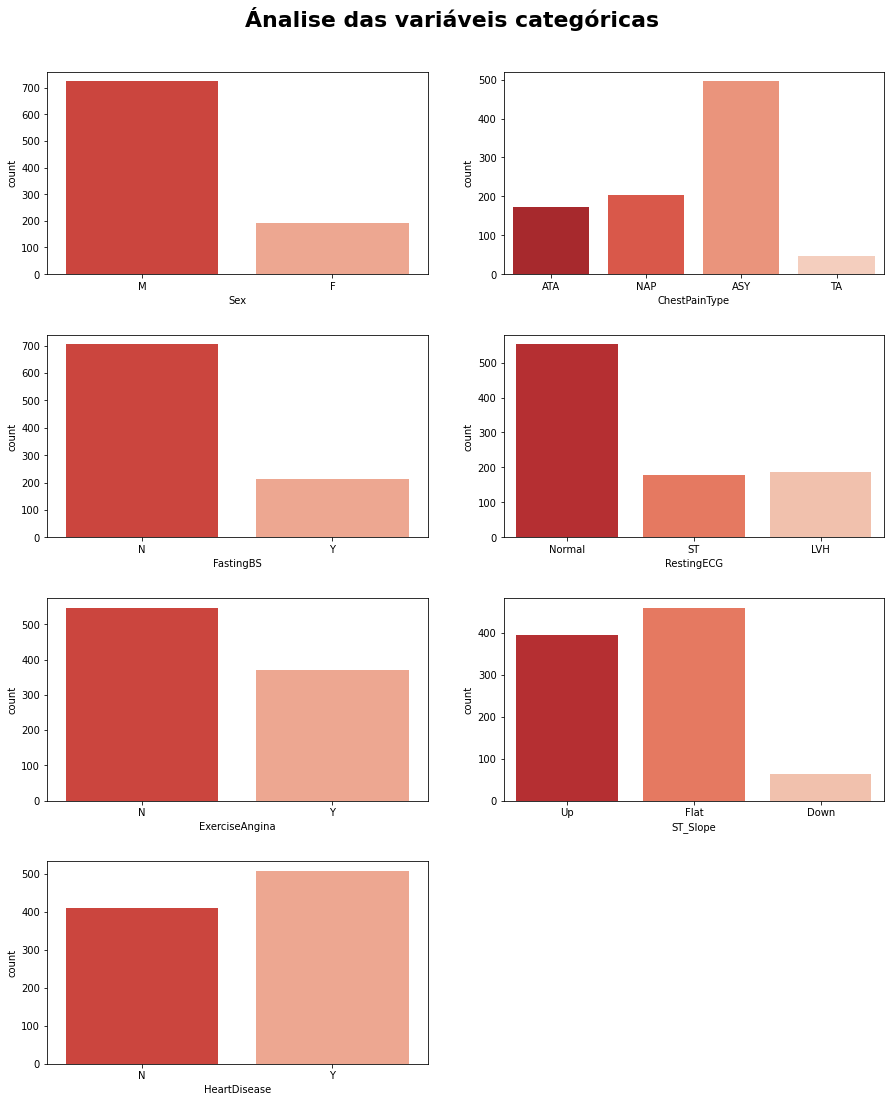

In [55]:
# Criando grid
figure, axis = plt.subplots( figsize = (15,30))

# Título
plt.suptitle('Ánalise das variáveis categóricas', fontsize=22, fontweight=600)

# Estrutura
rows = 7
columns = 2
position = 1


# Plot no grid
for index in range(0, len(categoric_columns)):
  plt.subplot(rows, columns, position)
  sns.countplot(x=heart_db[categoric_columns[index]], palette='Reds_r')
  position += 1

plt.subplots_adjust( top=0.95, hspace=0.3 )

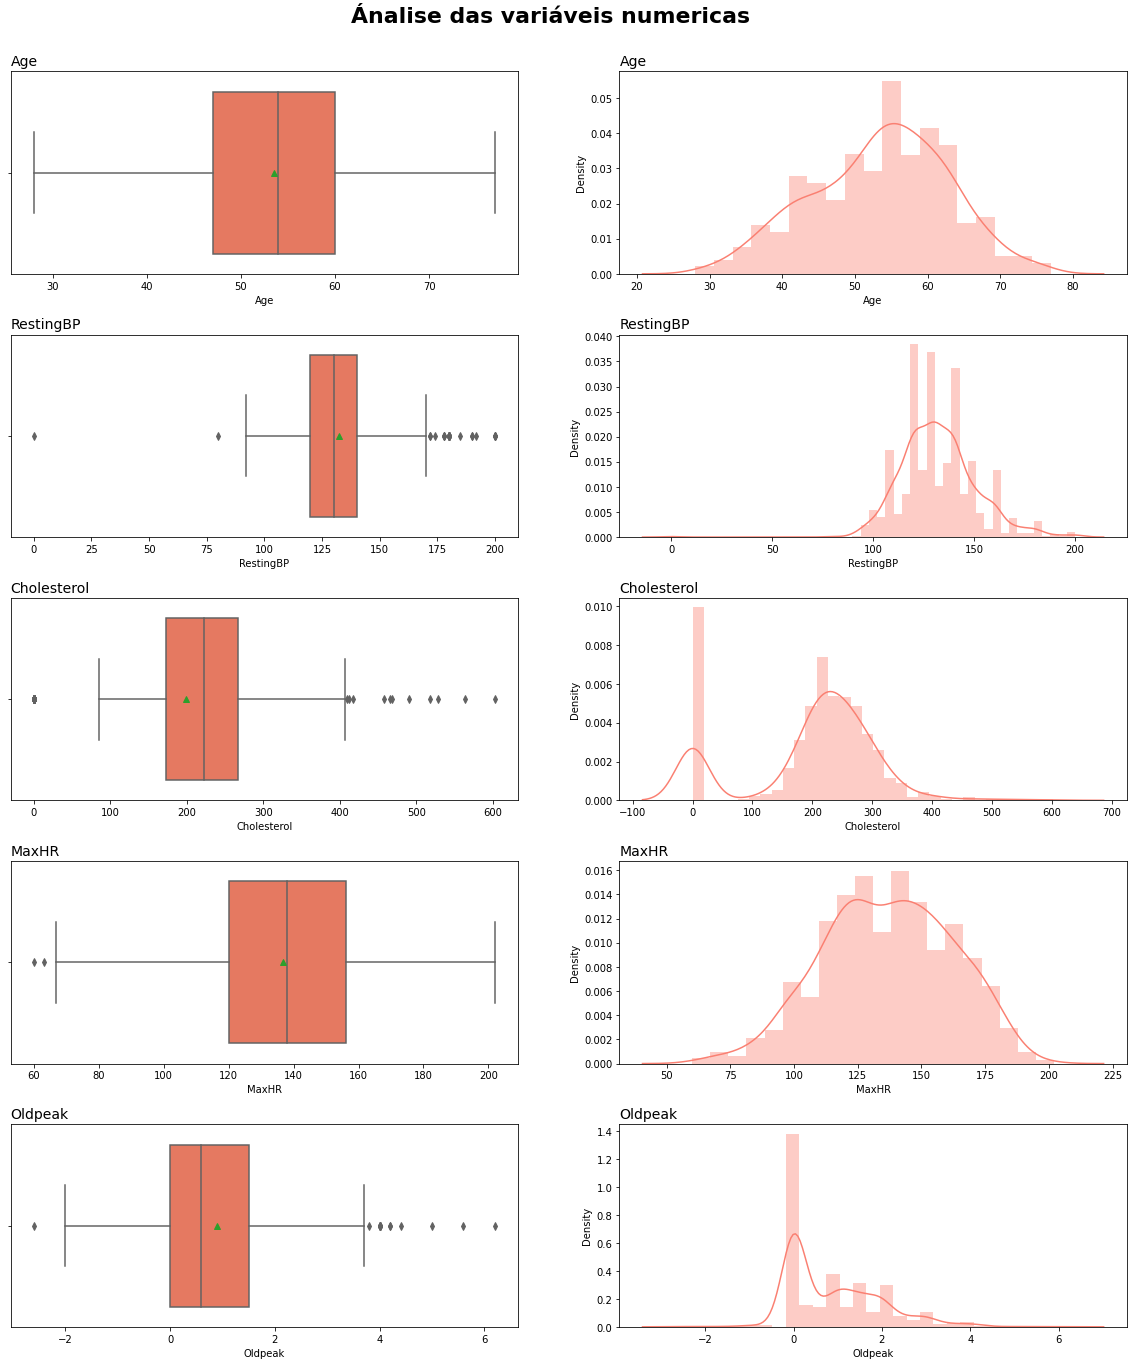

In [56]:
# Criando grid
figure, axis = plt.subplots( figsize = (20,30) )

# Título
plt.suptitle('Ánalise das variáveis numericas', fontsize=22, fontweight=600)

# Estrutura
rows = 7
columns = 2
position = 1

# Plot no grid
for column in numeric_columns:
  plt.subplot(rows, columns, position);
  plt.title(column, loc='left', fontsize=14, fontweight=200)
  sns.boxplot( data=heart_db, x=column, showmeans=True, palette='Reds_r' );
  position += 1

  plt.subplot(rows, columns, position);
  plt.title(column, loc='left', fontsize=14, fontweight=200)
  sns.distplot( heart_db[column ], color = '#FA8072');
  position += 1

plt.subplots_adjust( top=0.95, hspace=0.3 )

## **4.0 Pré-processamento dos dados**

In [57]:
# Divisão entre atributos previsoes e classe
X_heart = heart_db.iloc[:, 0:-1].values
y_heart = heart_db.iloc[:, -1].values

In [58]:
# Importando bibliotecas OneHot
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [59]:
# Instanciando OneHotEncoder
oneHotEncoder_heart = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1,2,5,6,8,10])], remainder='passthrough')

In [60]:
# Encodando atributos previsores no formato OneHot
X_heart = oneHotEncoder_heart.fit_transform(X_heart)

In [61]:
# Importando biblioteca de padronização
from sklearn.preprocessing import StandardScaler

In [62]:
# Instanciando StandartScaler
scaled_heart = StandardScaler()

In [63]:
# Padronizando atributos previsores
X_heart = scaled_heart.fit_transform(X_heart)

In [64]:
# Importando biblioteca LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [65]:
# Instanciando LabelEncoder
labelEncoder_heart = LabelEncoder()

In [66]:
# Encodando atributo alvo
y_heart = labelEncoder_heart.fit_transform(y_heart)

## **5.0 Seleção do modelo**

In [67]:
from sklearn.model_selection import GridSearchCV

### **Naive Bayes - 83,87%**

In [68]:
from sklearn.naive_bayes import GaussianNB

In [69]:
parameters = {}

In [70]:
grid_search = GridSearchCV(estimator=GaussianNB(), param_grid=parameters)

In [71]:
grid_search.fit(X_heart, y_heart)

GridSearchCV(estimator=GaussianNB(), param_grid={})

In [72]:
best_parameters = grid_search.best_params_
print(best_parameters)

{}


In [73]:
best_score = grid_search.best_score_
print(best_score * 100)

83.87205987170348


### **Decistion Tree - 83,32%**

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
parameters = { 'criterion': ['gini', 'entropy'],
               'splitter': ['best', 'random'],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1,5,10]}

In [76]:
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)

In [77]:
grid_search.fit(X_heart, y_heart)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [78]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'random'}


In [79]:
best_score = grid_search.best_score_
print(best_score * 100)

82.34675694939415


### **Random Forest - 84,73%**

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
parameters = { 'criterion': ['gini', 'entropy'],
               'n_estimators': [10, 40 ,100, 150],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1,5,10]}

In [82]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parameters)

In [83]:
grid_search.fit(X_heart, y_heart)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 40, 100, 150]})

In [84]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 40}


In [85]:
best_score = grid_search.best_score_
print(best_score * 100)

84.84853884533143


### **KNN - 83,87%**

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
parameters = { 'n_neighbors': [3, 5, 10, 20],
              'p': [1, 2]}

In [88]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)

In [89]:
grid_search.fit(X_heart, y_heart)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 10, 20], 'p': [1, 2]})

In [90]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'n_neighbors': 20, 'p': 1}


In [91]:
best_score = grid_search.best_score_
print(best_score * 100)

83.87027797576621


### **Regressão logística - 82,67%**

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
parameters = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [94]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)

In [95]:
grid_search.fit(X_heart, y_heart)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1.0, 1.5, 2.0],
                         'solver': ['lbfgs', 'sag', 'saga'],
                         'tol': [0.0001, 1e-05, 1e-06]})

In [96]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 1.0, 'solver': 'lbfgs', 'tol': 0.0001}


In [97]:
best_score = grid_search.best_score_
print(best_score * 100)

82.67581373247802


### **SVM - 83,65%**

In [98]:
from sklearn.svm import SVC

In [99]:
parameters = {'tol': [0.0001, 0.00001, 0.000001],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [100]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parameters)

In [101]:
grid_search.fit(X_heart, y_heart)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 1.5, 2.0],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'tol': [0.0001, 1e-05, 1e-06]})

In [102]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'C': 1.0, 'kernel': 'sigmoid', 'tol': 0.0001}


In [103]:
best_score = grid_search.best_score_
print(best_score * 100)

83.65585649798051


## **6.0 Avaliação do modelo**

In [104]:
# Importando biblioteca para divisão treino / teste
from sklearn.model_selection import train_test_split

In [105]:
# Dividindo base de dados treino / teste
X_heart_training, X_heart_test, y_heart_training, y_heart_test = train_test_split(X_heart, y_heart, test_size=0.2, random_state=5)

In [106]:
# Instanciando modelo RanddomForestClassifier
rfc_heart = RandomForestClassifier(criterion= 'entropy', min_samples_leaf= 10, min_samples_split= 10, n_estimators= 100)

In [107]:
# Treinando modelo
rfc_heart.fit(X_heart_training, y_heart_training)

RandomForestClassifier(criterion='entropy', min_samples_leaf=10,
                       min_samples_split=10)

In [108]:
# Fazendo previsões
predictions = rfc_heart.predict(X_heart_test)

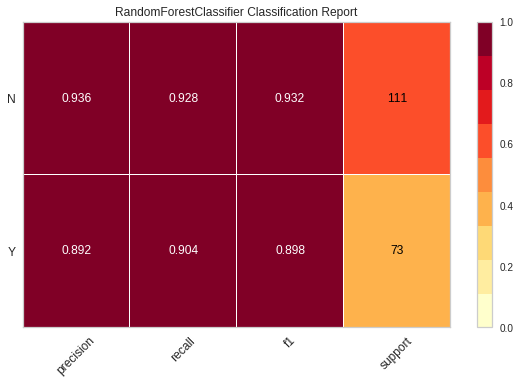

In [109]:
# Relatório de classificação
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(rfc_heart, classes = ['Y', 'N'], support=True)
visualizer.fit(X_heart_training, y_heart_training)
visualizer.score(X_heart_test, y_heart_test)
visualizer.show()

0.9184782608695652

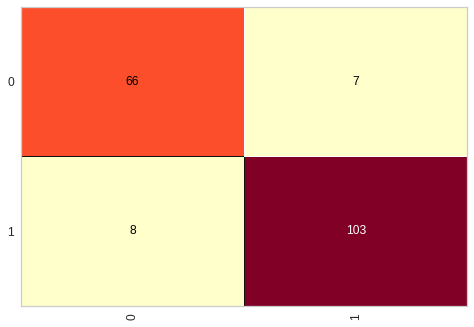

In [110]:
# Matriz Confusão
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rfc_heart)
cm.fit(X_heart_training, y_heart_training)
cm.score(X_heart_test, y_heart_test)

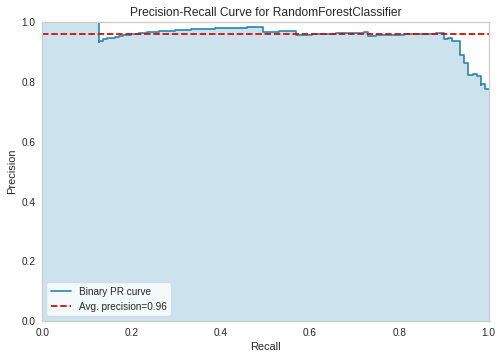

In [111]:
# Curva precision-recall
from yellowbrick.classifier import PrecisionRecallCurve
visualizer = PrecisionRecallCurve(rfc_heart)
visualizer.fit(X_heart_training, y_heart_training)
visualizer.score(X_heart_test, y_heart_test)
visualizer.show();